# Лабораторная работа №1: Оценка точности модели с непрерывной зависимой переменной <br>
## Вариант 15 <br>
## ПМИ3-1, Лязер Г.В.

### Условие задачи для варианта 15
__Функция для задачи 1:__<br>
$f(X) = 16 - 0.1x$<br><br>

__Характеристики для задачи 2:__<br>
__sigma__ = 2, __sigma__ = 3, __sigma__ =  4.

In [1]:
import numpy as np
import random

In [2]:
np.random.seed(15)

n_all, train_percent = 60, 0.86

x_min, x_max = 5, 105

x = np.random.uniform(x_min, x_max, n_all)

mu, sigma = 0, 1
res = np.random.normal(mu, sigma, n_all)

in_train = np.random.choice(np.arange(n_all), int(n_all*train_percent), replace=False)

def y_func (x):
	return (16-0.1*x)

x_line = np.linspace(x_min, x_max, n_all)
y_line = y_func(x_line)

y = y_func(x) + res

x_train = x[in_train]
y_train = y[in_train]

x_test = np.delete(x, in_train)
y_test = np.delete(y, in_train)

In [3]:
import matplotlib.pyplot as plt

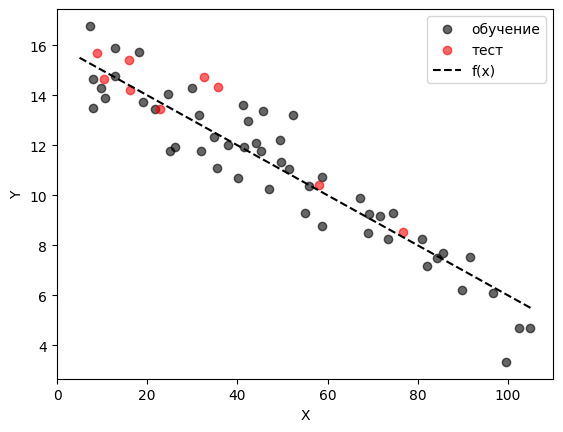

In [4]:
plt.scatter(x_train, y_train, c='black', label = 'обучение', alpha = 0.6)

plt.scatter(x_test, y_test, c='red', label = 'тест', alpha = 0.6)

plt.plot(x_line, y_line, c='black', linestyle='dashed', label='f(x)')

plt.xlabel('X')
plt.ylabel('Y')

plt.legend()
plt.show()

In [5]:
from pandas import DataFrame
from scipy.interpolate import UnivariateSpline, BSpline
import matplotlib.pyplot as plt

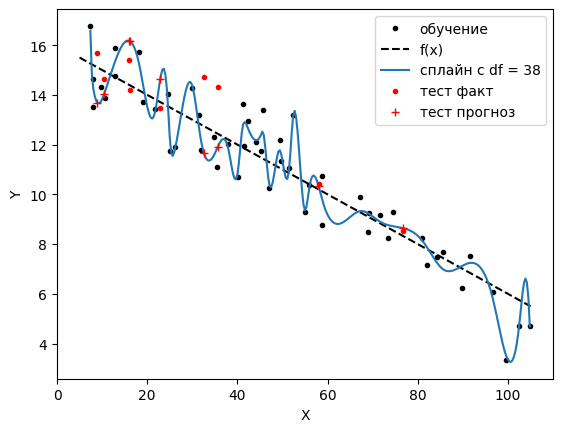

In [6]:
my_df = 38

x_sorted_index = sorted(range(len(x_train)), key=lambda k: x_train[k])

x_train_lin = np.linspace(min(x_train), max(x_train), num=300, endpoint=True)

# Сортируем данные для сплайна
x_sorted = x_train[x_sorted_index]
y_sorted = y_train[x_sorted_index]

# Вычисляем параметр сглаживания на основе df
n = len(x_train)
s = n - my_df if my_df < n else (n - np.sqrt(2*n))

# строим сплаживающий сплайн с помощью UnivariateSpline
spline = UnivariateSpline(x_sorted, y_sorted, s=s)

# делаем прогнозы
y_hat_train = spline(x_train)
y_hat_test = spline(x_test)
y_lin_plot = spline(x_train_lin)

plt.plot(x_train, y_train, color='black', ls='', marker='.', label='обучение')
plt.plot(x_line, y_line, color='black', ls='dashed', marker='', label='f(x)')
plt.plot(x_train_lin, y_lin_plot, marker='', label='сплайн с df = %s' % my_df)
plt.plot(x_test, y_test, color='red', ls='', marker='.', label='тест факт')
plt.plot(x_test, y_hat_test, color='red', ls='', marker='+', label='тест прогноз')

plt.xlabel('X')
plt.ylabel('Y')

plt.legend(loc='best')

MSE_fit = [sum((y_train-y_hat_train)**2)/len(y_train), sum((y_test-y_hat_test)**2)/len(y_test)]



In [7]:
np.around(MSE_fit, 2)

array([0.25, 2.84])

In [8]:
max_df = 40

MSE_all_dfs = [[0]*2 for i in range(2, max_df+1)]
MSE_all_dfs = DataFrame(MSE_all_dfs, columns=['MSE_train', 'MSE_test'], index=list(range(2,max_df+1)))

for i_df in range(2, max_df+1):
	s = n - i_df if i_df < n else (n - np.sqrt(2*n))
	spline = UnivariateSpline(x_sorted, y_sorted, s=s)
	y_train_hat = spline(x_train)
	y_test_hat = spline(x_test)

	MSE_all_dfs.loc[i_df, 'MSE_train'] = sum((y_train - y_train_hat)**2)/len(y_train_hat)
	MSE_all_dfs.loc[i_df, 'MSE_test'] = sum((y_test - y_test_hat)**2)/len(y_test_hat)

C:\Users\lyaze\AppData\Local\Temp\ipykernel_14808\2091054430.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.9599434982502866' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  MSE_all_dfs.loc[i_df, 'MSE_train'] = sum((y_train - y_train_hat)**2)/len(y_train_hat)
C:\Users\lyaze\AppData\Local\Temp\ipykernel_14808\2091054430.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.0873124703625576' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  MSE_all_dfs.loc[i_df, 'MSE_test'] = sum((y_test - y_test_hat)**2)/len(y_test_hat)


In [9]:
MSE_all_dfs[MSE_all_dfs['MSE_test']==min(MSE_all_dfs['MSE_test'])]

,MSE_train,MSE_test
2,0.959943,1.087312


In [ ]:
MSE_all_dfs['MSE_train']

2     0.959943
3     0.941495
4     0.921311
5     0.902643
6     0.882974
7     0.863429
8     0.842895
9     0.824191
10    0.803955
11    0.784360
12    0.764837
13    0.744666
14    0.725664
15    0.705252
16    0.686125
17    0.666677
18    0.647075
19    0.627408
20    0.607720
21    0.588227
22    0.568668
23    0.548577
24    0.529567
25    0.509586
26    0.490166
27    0.470499
28    0.450856
29    0.431130
30    0.411806
31    0.392146
32    0.372565
33    0.352988
34    0.333323
35    0.313736
36    0.294140
37    0.274506
38    0.254892
39    0.235322
40    0.215686
Name: MSE_train, dtype: float64

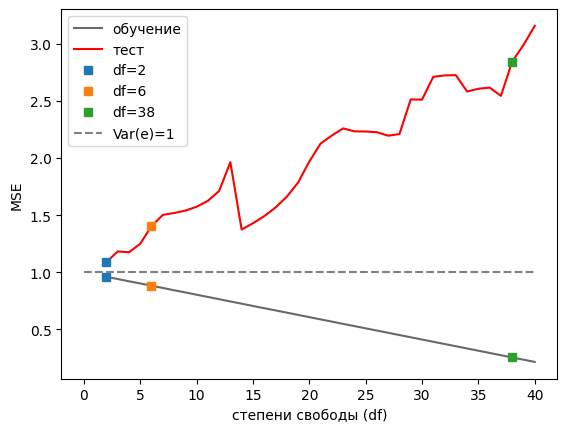

In [ ]:
plt.plot(MSE_all_dfs.index, MSE_all_dfs['MSE_train'], color='dimgrey', marker='', label='обучение')
plt.plot(MSE_all_dfs.index, MSE_all_dfs['MSE_test'], color='red', marker='', label='тест')
plt.plot([2, 2], [MSE_all_dfs.iloc[0]['MSE_train'], MSE_all_dfs.iloc[0]['MSE_test']], ls='', marker='s', label='df=2')
plt.plot([6, 6], [MSE_all_dfs.iloc[4]['MSE_train'], MSE_all_dfs.iloc[4]['MSE_test']], ls='', marker='s', label='df=6')
plt.plot([38, 38], [MSE_all_dfs.iloc[36]['MSE_train'], MSE_all_dfs.iloc[36]['MSE_test']], ls='', marker='s', label='df=38')
plt.hlines(1, 0, 40, linestyles='dashed', color='grey', label='Var(e)=1')

plt.xlabel('степени свободы (df)')
plt.ylabel('MSE')
plt.legend(loc = 'best')
plt.show()

MSE на тестовой выборке растет, при этом есть некоторые места падения, минимальное значение при df=2. <br>
MSE на обучающей выборке постоянно падает, минимальное значение при df = 40. <br>
Чем больше число степеней свободы, тем больше разница MSE, в следствие чего лучшую
модель следуют выбирать по минимуму на кривой MSE на тестовой выборке (df=2).